In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
data=pd.read_csv("1000_Companies.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [37]:
x=data.iloc[: , :-1].values
y=data.iloc[: , 4].values
a=['State']

def convert(data,column):
    data[column]=pd.to_numeric(data[column],errors ="coerce")

for column in a:
    convert(data,column)


<Axes: >

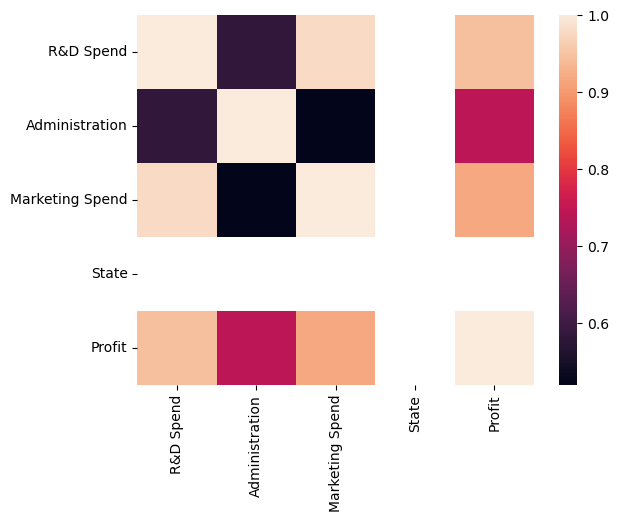

In [38]:
sns.heatmap(data.corr())

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelen= LabelEncoder()
x[:,3] = labelen.fit_transform(x[:, 3])

one=ColumnTransformer([( 'my_ohe',OneHotEncoder(), [0])], remainder='passthrough')
x=one.fit_transform(x).toarray()


In [40]:
x=x[:,1:]

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x,y ,test_size=0.2,random_state=0)

In [42]:
from sklearn.linear_model import LinearRegression
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [43]:
pred=r.predict(x_test)
pred

array([ 59465.69818401,  57709.67332762,  66038.91085702, 184076.81404836,
        77878.42604641, 112856.36116067, 185665.50785702,  61632.82493888,
       182432.07225566,  26370.54252566,  30050.90256444, 151733.46863268,
       107276.2065839 ,  20247.44414003, 172439.20106784,  67452.78918965,
       110112.69873678, 155775.20054296, 205989.94078289, 204933.28044767,
       144640.93490822,  54158.94512227, 190917.46420122,  52195.15899763,
        79060.45884311,  74202.38138285,  41351.55465387,  43711.64427618,
        32557.29916934, 252560.50146017, 113371.67718311,  87713.49433063,
       101157.63379284, 135497.14680328,  26212.84463239,  84021.31143889,
       210014.59029413, 178618.6601961 , 182741.83727127, 109370.06254699,
        95031.99181668, 156905.73125624,  82561.45697966,  22470.59771837,
       107879.2651159 ,  19339.04117679, 161843.04333623,  58976.90481773,
       163531.65613832, 126712.60277244, 195924.73166131, 182696.52780225,
        64559.1644733 ,  

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.789595822383191